
Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.options.display.max_columns = 999

dat_df = pd.read_csv("../data/ufc/data.csv")
prep_dat_df = pd.read_csv("../data/ufc/preprocessed_data.csv")
raw_fighters_df = pd.read_csv("../data/ufc/raw_fighter_details.csv")
raw_dat_df = pd.read_csv("../data/ufc/raw_total_fight_data.csv", sep=";")

dat_df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,

In [3]:
# I'd like to have one row per fighter per fight. That is, 2 rows per fight, with a simple "is_winner" column.

import re


r_fighter_cols = [col for col in dat_df.columns if col.startswith("R_")]
b_fighter_cols = [col for col in dat_df.columns if col.startswith("B_")]

other_cols = [col for col in dat_df.columns if col not in r_fighter_cols and col not in b_fighter_cols]

def extractFighters(dat_df, fighter_cols, opp_cols, fighter_prefix, opp_prefix, fighter_color):

    fighters_df = dat_df[fighter_cols + other_cols].copy()
    fighters_df.columns = [col.replace(fighter_prefix, "") for col in fighters_df.columns]
    fighters_df["is_winner"] = fighters_df["Winner"] == fighter_color

    opp_df = dat_df[opp_cols].copy()
    opp_df.columns = [re.sub(r"^" + opp_prefix, "opponent_", col) for col in opp_df.columns]

    fighters_df = pd.concat([fighters_df, opp_df], axis=1)
    
    return fighters_df

r_fighters_df = extractFighters(dat_df, r_fighter_cols, b_fighter_cols, "R_", "B_", "Red")
b_fighters_df = extractFighters(dat_df, b_fighter_cols, r_fighter_cols, "B_", "R_", "Blue")

fighters_df = pd.concat([r_fighters_df, b_fighters_df], axis=0)
fighters_df.head()

,Height_cms,Reach_cms,Referee,Stance,Weight_lbs,Winner,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUATT,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,current_lose_streak,current_win_streak,date,draw,fighter,is_winner,location,longest_win_streak,losses,no_of_rounds,opponent_Height_cms,opponent_Reach_cms,opponent_Stance,opponent_Weight_lbs,opponent_age,opponent_avg_BODY_att,opponent_avg_BODY_landed,opponent_avg_CLINCH_att,opponent_avg_CLINCH_landed,opponent_avg_DISTANCE_att,opponent_avg_DISTANCE_landed,opponent_avg_GROUND_att,opponent_avg_GROUND_landed,opponent_avg_HEAD_att,opponent_avg_HEAD_landed,opponent_avg_KD,opponent_avg_LEG_att,opponent_avg_LEG_landed,opponent_avg_PASS,opponent_avg_REV,opponent_avg_SIG_STR_att,opponent_avg_SIG_STR_landed,opponent_avg_SIG_STR_pct,opponent_avg_SUB_ATT,opponent_avg_TD_att,opponent_avg_TD_landed,opponent_avg_TD_pct,opponent_avg_TOTAL_STR_att,opponent_avg_TOTAL_STR_landed,opponent_avg_opp_BODY_att,opponent_avg_opp_BODY_landed,opponent_avg_opp_CLINCH_att,opponent_avg_opp_CLINCH_landed,opponent_avg_opp_DISTANCE_att,opponent_avg_opp_DISTANCE_landed,opponent_avg_opp_GROUND_att,opponent_avg_opp_GROUND_landed,opponent_avg_opp_HEAD_att,opponent_avg_opp_HEAD_landed,opponent_avg_opp_KD,opponent_avg_opp_LEG_att,opponent_avg_opp_LEG_landed,opponent_avg_opp_PASS,opponent_avg_opp_REV,opponent_avg_opp_SIG_STR_att,opponent_avg_opp_SIG_STR_landed,opponent_avg_opp_SIG_STR_pct,opponent_avg_opp_SUB_ATT,opponent_avg_opp_TD_att,opponent_avg_opp_TD_landed,opponent_avg_opp_TD_pct,opponent_avg_opp_TOTAL_STR_att,opponent_avg_opp_TOTAL_STR_landed,opponent_current_lose_streak,opponent_current_win_streak,opponent_draw,opponent_fighter,opponent_longest_win_streak,opponent_losses,opponent_total_rounds_fought,opponent_total_time_fought(seconds),opponent_total_title_bouts,opponent_win_by_Decision_Majority,opponent_win_by_Decision_Split,opponent_win_by_Decision_Unanimous,opponent_win_by_KO/TKO,opponent_win_by_Submission,opponent_win_by_TKO_Doctor_Stoppage,opponent_wins,title_bout,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins
0,162.56,162.56,Marc Goddard,Orthodox,135.0,Red,32.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,NaN,NaN,NaN,101.400000,44.000000,0.466000,NaN,0.100000,5.300000,1.900000,0.458000,NaN,NaN,129.900000,69.100000,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,NaN,NaN,NaN,98.800000,32.200000,0.336000,NaN,0.000000,0.900000,0.100000,0.050000,NaN,NaN,110.500000,43.300000,0.0,4.0,2019-06-08,0.0,Henry Cejudo,True,"Chicago, Illinois, USA",4.0,2.0,5,167.64,170.18,Orthodox,135.0,31.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400

In [4]:

for col in [col for col in fighters_df.select_dtypes(include="number").columns if col.startswith("opponent_")]:
    
    col2 = col
    col1 = col[9:]
    
    fighters_df[col1 + "_ratio"] = (fighters_df[col1] + 1) / (fighters_df[col2] + 1)
    
# prevent leakage
fighters_df = fighters_df.drop(columns="Winner")

# change prefixes to suffixes
fighters_df.columns = [col[9:] + "_opponent" if col.startswith("opponent_") else col for col in fighters_df.columns]


In [5]:

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import eli5
from eli5.sklearn import PermutationImportance

from matplotlib import pyplot as plt


target = "is_winner"
features = fighters_df.columns.drop([target] + ["age", "Referee"])


transformer = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy="constant", fill_value=0),
    StandardScaler(),
)

train, test = train_test_split(fighters_df)

X_train = transformer.fit_transform(train[features])
y_train = train[target]

X_test = transformer.transform(test[features])
y_test = test[target]

model = RandomForestClassifier(n_jobs=-1, n_estimators=120)
model.fit(X_train, y_train)

permuter = PermutationImportance(
    model,
    scoring="accuracy",
    n_iter=10,
)

permuter.fit(X_test, y_test)


/home/cowley/venv/lambda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/cowley/venv/lambda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

/home/cowley/venv/lambda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


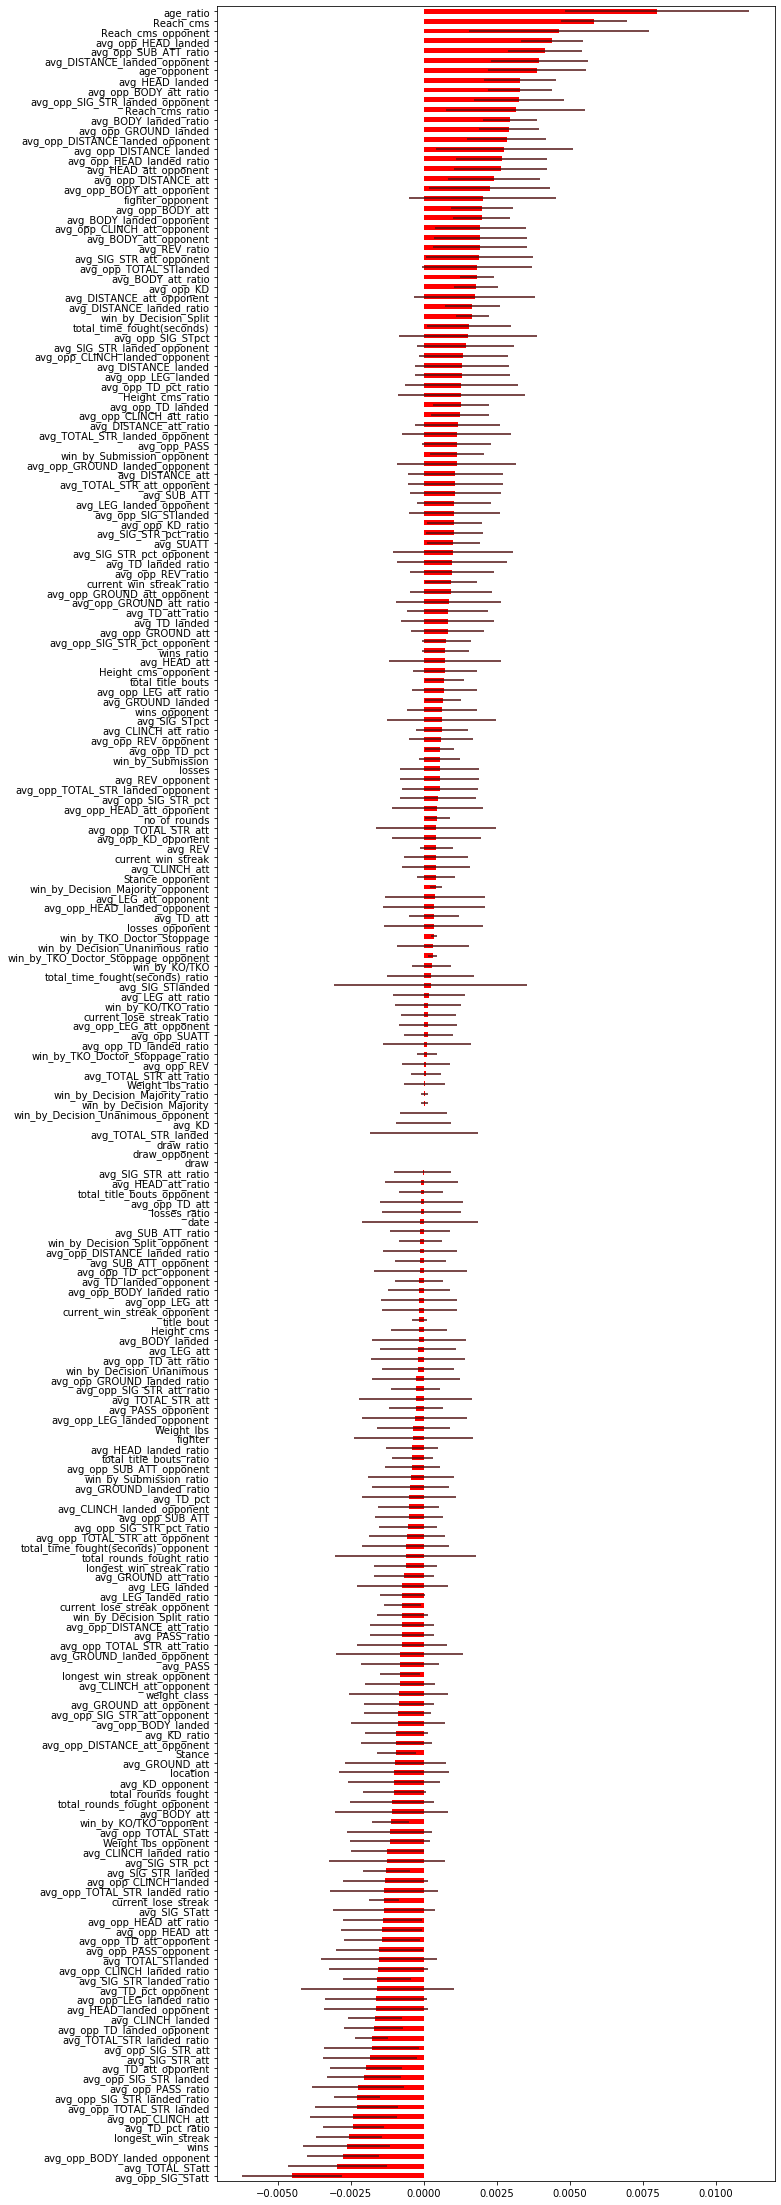

In [13]:
fig, ax = plt.subplots(figsize=(10, 40))

feature_importances = pd.Series(permuter.feature_importances_, fighters_df.columns.drop([target] + ["age", "Referee"])).sort_values()
feature_importances_std = pd.Series(permuter.feature_importances_std_, fighters_df.columns.drop([target] + ["age", "Referee"])).sort_values()
feature_importances.plot.barh(color="red", ecolor="#501010", xerr=feature_importances_std, ax=ax)

fig.show()

In [62]:
feature_importances_plus_error = pd.Series(permuter.feature_importances_ + permuter.feature_importances_std_, fighters_df.columns.drop([target] + ["age", "Referee"]))

features = fighters_df.columns.drop([target] + ["age", "Referee", "location"] + list(feature_importances_plus_error[feature_importances_plus_error <= 0].index))

pipeline = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy="constant", fill_value=0),
    StandardScaler(),
    RandomForestClassifier(n_jobs=-1, n_estimators=120),
)

train, test = train_test_split(fighters_df)

X_train = fighters_df[features]
y_train = fighters_df[target]

X_test = test[features]
y_test = test[target]

pipeline.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['date', 'fighter', 'Stance_opponent',
                                     'fighter_opponent', 'weight_class'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=0,
                               missing_values=nan, strategy...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                     

In [64]:


prefix_re = re.compile(r".*(_opponent)|(_ratio)$")

fighters_individual_df = fighters_df[[col for col in fighters_df.columns.drop(["is_winner"]) if not prefix_re.match(col)]]
latest_fights = fighters_individual_df.sort_values(by="date").groupby("fighter").tail(1)

def getByFighter(fighter_name):
    return latest_fights[latest_fights["fighter"] == fighter_name].copy()

def makeBoutDf(fighter1, fighter2):
    
    fighter1_df = getByFighter(fighter1)
    fighter2_df = getByFighter(fighter2)
    
    fighter1_df["temp_id_"] = fighter2_df["temp_id_"] = np.random.randint(2**31)
    fighter1_df, fighter2_df = (
        pd.merge(fighter1_df, fighter2_df, on="temp_id_", suffixes=("", "_opponent")),
        pd.merge(fighter2_df, fighter1_df, on="temp_id_", suffixes=("", "_opponent")),
    )
    
    fight_df = pd.concat([fighter1_df, fighter2_df])
    
    for col in [col for col in fight_df.select_dtypes(include="number").columns if col.endswith("_opponent")]:

        col2 = col
        col1 = col[:-9]

        fight_df[col1 + "_ratio"] = (fight_df[col1] + 1) / (fight_df[col2] + 1)
    
    fight_df["stance_config"] = fight_df["Stance"] + "-" + fight_df["Stance_opponent"]
    
    return fight_df.drop(columns=["temp_id_"])

def scoreBout(bout):
    return pd.DataFrame(data=pipeline.predict_proba(bout[features]), columns=[str(x) for x in pipeline.classes_])

def doPrediction(red_fighter, blue_fighter):
    bout = makeBoutDf(red_fighter, blue_fighter)
    probas = scoreBout(bout)
    
    red_fighter_prob = (probas.iloc[0]["True"] + probas.iloc[1]["False"])/2
    blue_fighter_prob = (probas.iloc[0]["False"] + probas.iloc[1]["True"])/2

    print(red_fighter_prob, "+", blue_fighter_prob, "=", red_fighter_prob+blue_fighter_prob)
    
    if red_fighter_prob > blue_fighter_prob:
        return red_fighter_prob, red_fighter
    
    else:
        return blue_fighter_prob, blue_fighter

trials = [
    ("Kamaru Usman", "Colby Covington"),
    ("Jorge Masvidal", "Nate Diaz"),
    ("Conor McGregor", "Khabib Nurmagomedov"),
    ("Robert Whittaker", "Israel Adesanya"),
    ("Max Holloway", "Frankie Edgar"),
    ("Michelle Waterson", "Joanna Jedrzejczyk"),
    ("Amanda Nunes", "Germaine de Randamie"),
    ("Jon Jones", "Anthony Smith"),
    ("Khabib Nurmagomedov", "Dustin Poirier"),
    ("Ben Askren", "Robbie Lawler"),
    ("Alexander Volkanovski", "Max Holloway"),
    ("Ben Askren", "Jorge Masvidal"),
]

for b_fighter, r_fighter in trials:
    print(b_fighter, "vs", r_fighter)
    print("\t", doPrediction(b_fighter, r_fighter))

Kamaru Usman vs Colby Covington
0.4916666666666667 + 0.5083333333333333 = 1.0
	 (0.5083333333333333, 'Colby Covington')
Jorge Masvidal vs Nate Diaz
0.4833333333333334 + 0.5166666666666667 = 1.0
	 (0.5166666666666667, 'Nate Diaz')
Conor McGregor vs Khabib Nurmagomedov
0.19583333333333336 + 0.8041666666666667 = 1.0
	 (0.8041666666666667, 'Khabib Nurmagomedov')
Robert Whittaker vs Israel Adesanya
0.4916666666666667 + 0.5083333333333333 = 1.0
	 (0.5083333333333333, 'Israel Adesanya')
Max Holloway vs Frankie Edgar
0.4666666666666667 + 0.5333333333333333 = 1.0
	 (0.5333333333333333, 'Frankie Edgar')
Michelle Waterson vs Joanna Jedrzejczyk
0.5166666666666667 + 0.4833333333333334 = 1.0
	 (0.5166666666666667, 'Michelle Waterson')
Amanda Nunes vs Germaine de Randamie
0.5958333333333333 + 0.4041666666666667 = 1.0
	 (0.5958333333333333, 'Amanda Nunes')
Jon Jones vs Anthony Smith
0.6875 + 0.3125 = 1.0
	 (0.6875, 'Jon Jones')
Khabib Nurmagomedov vs Dustin Poirier
0.7333333333333334 + 0.2666666666666

In [30]:
from pdpbox.pdp import pdp_isolate, pdp_plot
from xgboost import XGBClassifier

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb2f1328f98>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb2d399e7f0>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


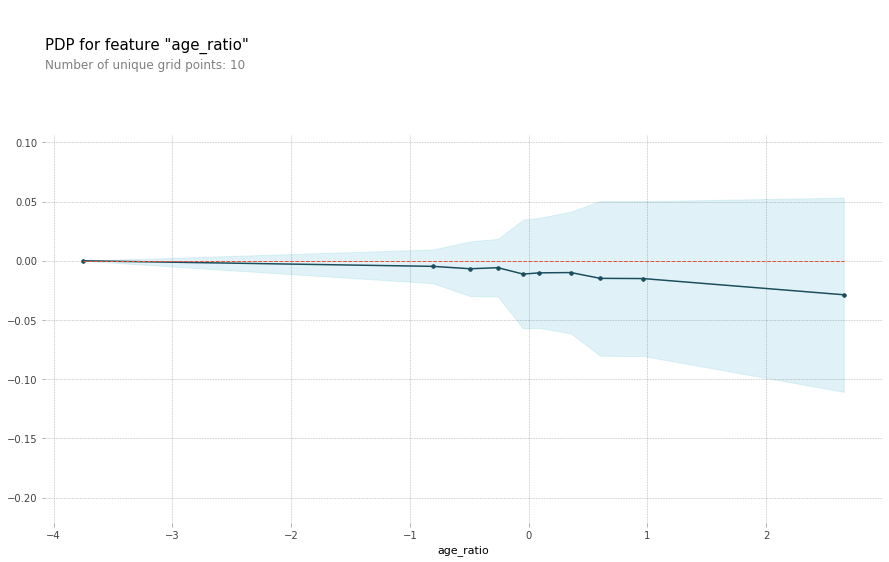

In [38]:

transformer = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy="constant", fill_value=0),
    StandardScaler(),
)

model = make_pipeline(
    XGBClassifier(n_jobs=-1, n_estimators=220, max_depth=76, learning_rate=0.25),
)

X_train_transformed = pd.DataFrame(data=transformer.fit_transform(X_train), columns=X_train.columns)
X_test_transformed = pd.DataFrame(data=transformer.transform(X_test), columns=X_test.columns)

model.fit(X_train_transformed, y_train)

isolated = pdp_isolate(
    model=model,
    dataset=X_test_transformed,
    model_features=X_test.columns,
    feature="age_ratio",
)

pdp_plot(isolated, feature_name="age_ratio")

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb2e28df400>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb2d061e6a0>})

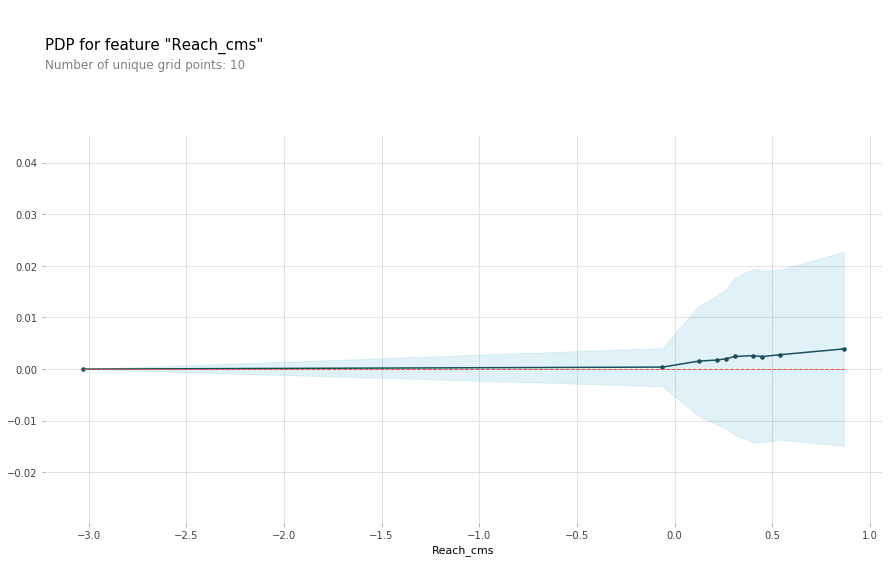

In [39]:

isolated = pdp_isolate(
    model=model,
    dataset=X_test_transformed,
    model_features=X_test.columns,
    feature="Reach_cms",
)

pdp_plot(isolated, feature_name="Reach_cms")

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb2d1a8d860>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb2cb3d1d30>})

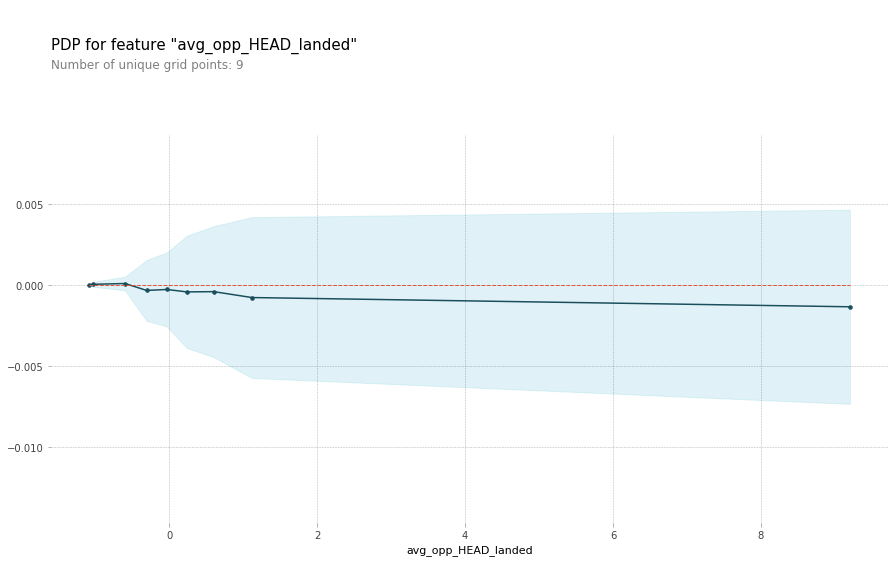

In [40]:

isolated = pdp_isolate(
    model=model,
    dataset=X_test_transformed,
    model_features=X_test.columns,
    feature="avg_opp_HEAD_landed",
)

pdp_plot(isolated, feature_name="avg_opp_HEAD_landed")

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb2cae97ac8>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb2caeeca20>})

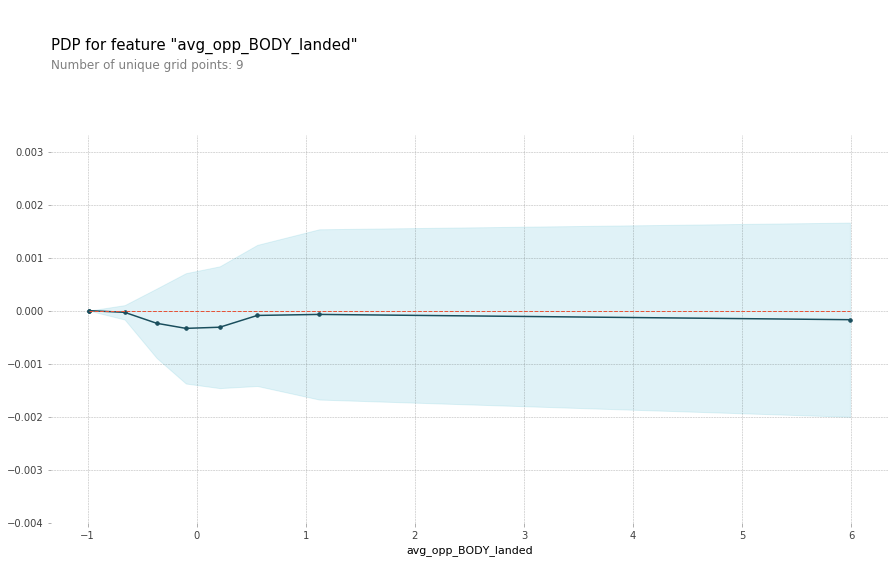

In [41]:

isolated = pdp_isolate(
    model=model,
    dataset=X_test_transformed,
    model_features=X_test.columns,
    feature="avg_opp_BODY_landed",
)

pdp_plot(isolated, feature_name="avg_opp_BODY_landed")

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb2cb531630>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb2f15e5710>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


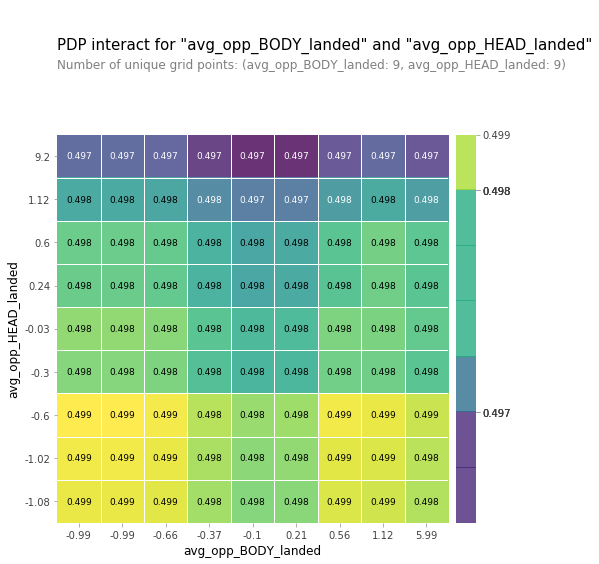

In [43]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ["avg_opp_BODY_landed", "avg_opp_HEAD_landed"]
interact = pdp_interact(
    model = model,
    dataset = X_test_transformed,
    model_features = X_test.columns,
    features=features,
)

pdp_interact_plot(interact, plot_type="grid", feature_names=features)

In [44]:
import shap

In [59]:
xmodel = model.named_steps["xgbclassifier"]

def shapPredict(r_fighter, b_fighter):
    
    bout = makeBoutDf(r_fighter, b_fighter)[X_test.columns]
    bout1_transformed = pd.DataFrame(data=transformer.transform(bout), columns=X_test.columns)
    
    pred = xmodel.predict(bout1_transformed)[0]
    
    explainer = shap.TreeExplainer(xmodel)
    shap_values = explainer.shap_values(bout1_transformed)
    
    feature_names = bout1_transformed.columns
    values = bout1_transformed.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, values))
    
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value,
        shap_values=shap_values,
        features = bout1_transformed
    )


In [60]:
shapPredict("Kamaru Usman", "Colby Covington")

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
